# Serum proteomic pattern diagnostics

Dataset from the FDA-NCI Clinical Proteomics Program Databank [1,2].

Each column of `A` represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 are ovarian cancer patients and 95 are normal patients.

Each row represents the ion intensity level at a specific mass-charge value indicated in MZ. There are 4000 mass-charge values, and each row represents the ion-intensity levels of the patients at that particular mass-charge value.

The variable `grp` holds the index information as to which of these samples represent cancer patients and which ones represent normal patients.

- [1] T.P. Conrads, et al., ["High-resolution serum proteomic features for ovarian detection"](https://doi.org/10.1677/erc.0.0110163), Endocrine-Related Cancer, 11, 2004, pp. 163-178.
- [2] E.F. Petricoin, et al., ["Use of proteomic patterns in serum to identify ovarian cancer"](https://doi.org/10.1016/s0140-6736(02)07746-2), Lancet, 359(9306), 2002, pp. 572-577.

In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ovariancancer_obs_path = Path("ovariancancer_obs.csv")
ovariancancer_grp_path = Path("ovariancancer_grp.csv")

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
with open(ovariancancer_grp_path) as fp:
  grp = np.array(fp.read().split("\n"))
grp = grp[grp != '']

How many patients? How many features?

In [12]:
n_features = A.shape[0]
n_patients = A.shape[1]

How many patiens with and without cancer are there in the dataset?

In [16]:
print(f"Cancer: {np.sum(grp == "Cancer")}")
print(f"Healthy: {np.sum(grp == "Normal")}")

Cancer: 121
Healthy: 95


Choose two proteins (between 1 and 4000), and make a scatterplot of the corresponding values plotting with different colors the data corresponding to patients with and without cancer. Can you easily distinguish between patients with/without cancer?

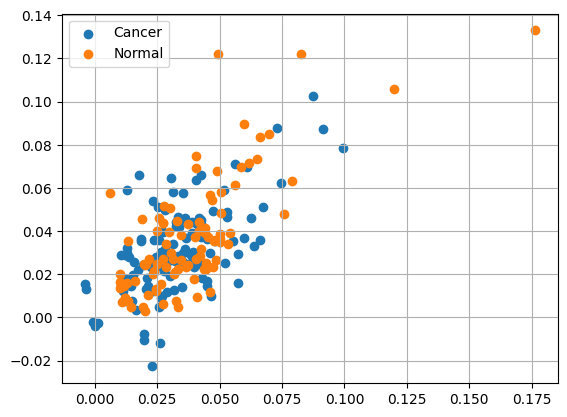

In [19]:
protein_x = 0
protein_y = 1

x_cancer = A[protein_x, grp == "Cancer"]
x_normal = A[protein_x, grp == "Normal"]

y_cancer = A[protein_y, grp == "Cancer"]
y_normal = A[protein_y, grp == "Normal"]

plt.scatter(x_cancer, y_cancer, label="Cancer")
plt.scatter(x_normal, y_normal, label="Normal")
plt.legend()
plt.grid()

Repeat the previous point, this time by considering three proteins.

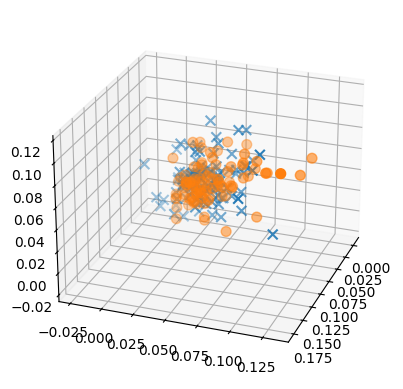

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

protein_x = 0
protein_y = 1
protein_z = 2

x_cancer = A[protein_x, grp == "Cancer"]
x_normal = A[protein_x, grp == "Normal"]
y_cancer = A[protein_y, grp == "Cancer"]
y_normal = A[protein_y, grp == "Normal"]
z_cancer = A[protein_z, grp == "Cancer"]
z_normal = A[protein_z, grp == "Normal"]

ax.scatter(x_cancer, y_cancer, z_cancer, label="Cancer", marker="x", s=50)
ax.scatter(x_normal, y_normal, z_normal, label="Normal", marker="o", s=50)

ax.view_init(25,20)

## Principal Components Analysis

Perform PCA on the data. 

In [21]:
A_mean = A.mean(axis=1, keepdims=True)
A_centered = A - A_mean

U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)

Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

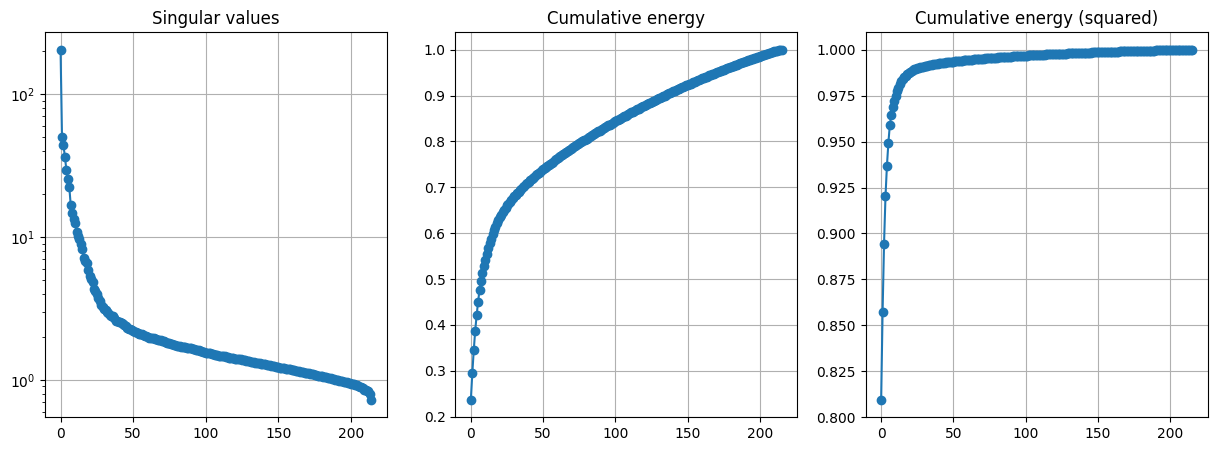

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# the last singular value is much smaller than the others, so we skip it in the plots
axs[0].semilogy(S[:-1], marker='o')
axs[0].set_title("Singular values")
axs[0].grid()

axs[1].plot(np.cumsum(S) / np.sum(S), marker='o')
axs[1].set_title("Cumulative energy")
axs[1].grid()

axs[2].plot(np.cumsum(S**2) / np.sum(S**2), marker='o')
axs[2].set_title("Cumulative energy (squared)")
axs[2].grid()

Make a scatterplot of the first two principal components of the patients.

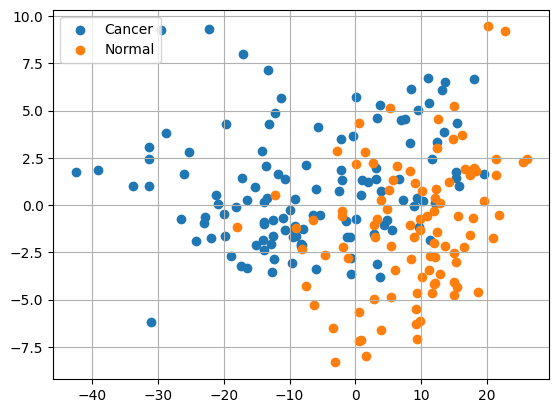

In [26]:
Phi = U[:, :2].T @ A_centered

plt.scatter(Phi[0, grp == "Cancer"], Phi[1, grp == "Cancer"], label="Cancer")
plt.scatter(Phi[0, grp == "Normal"], Phi[1, grp == "Normal"], label="Normal")
plt.legend()
plt.grid()

Make a scatterplot of the first three principal components of the patients.

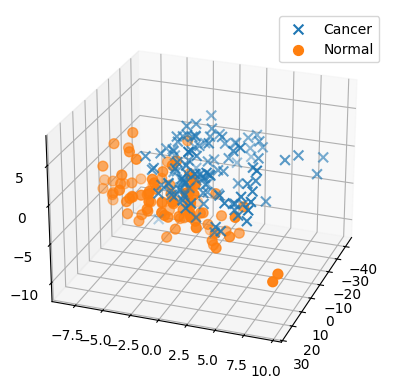

In [28]:
Phi = U[:, :3].T @ A_centered

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Phi[0, grp == "Cancer"], Phi[1, grp == "Cancer"], Phi[2, grp == "Cancer"], label="Cancer", marker="x", s=50)
ax.scatter(Phi[0, grp == "Normal"], Phi[1, grp == "Normal"], Phi[2, grp == "Normal"], label="Normal", marker="o", s=50)
ax.legend()
ax.view_init(25,20)